In [244]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import umap.umap_ as umap
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer






pd.set_option('display.max_columns', None)

In [245]:
df_raw = pd.read_csv(r'marketing_campaign.csv', sep='\t')

In [246]:
df = df_raw.copy()

In [247]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [248]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [249]:
df.shape

(2240, 29)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [251]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [252]:
df.fillna(df['Income'].mean(),inplace=True)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [254]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [255]:
df.shape

(2240, 29)

In [256]:
categorical_features = ['Education', 'Marital_Status']
numerical_features = [ 'Year_Birth','Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


# EDA before Clustering

In [257]:
df[numerical_features].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


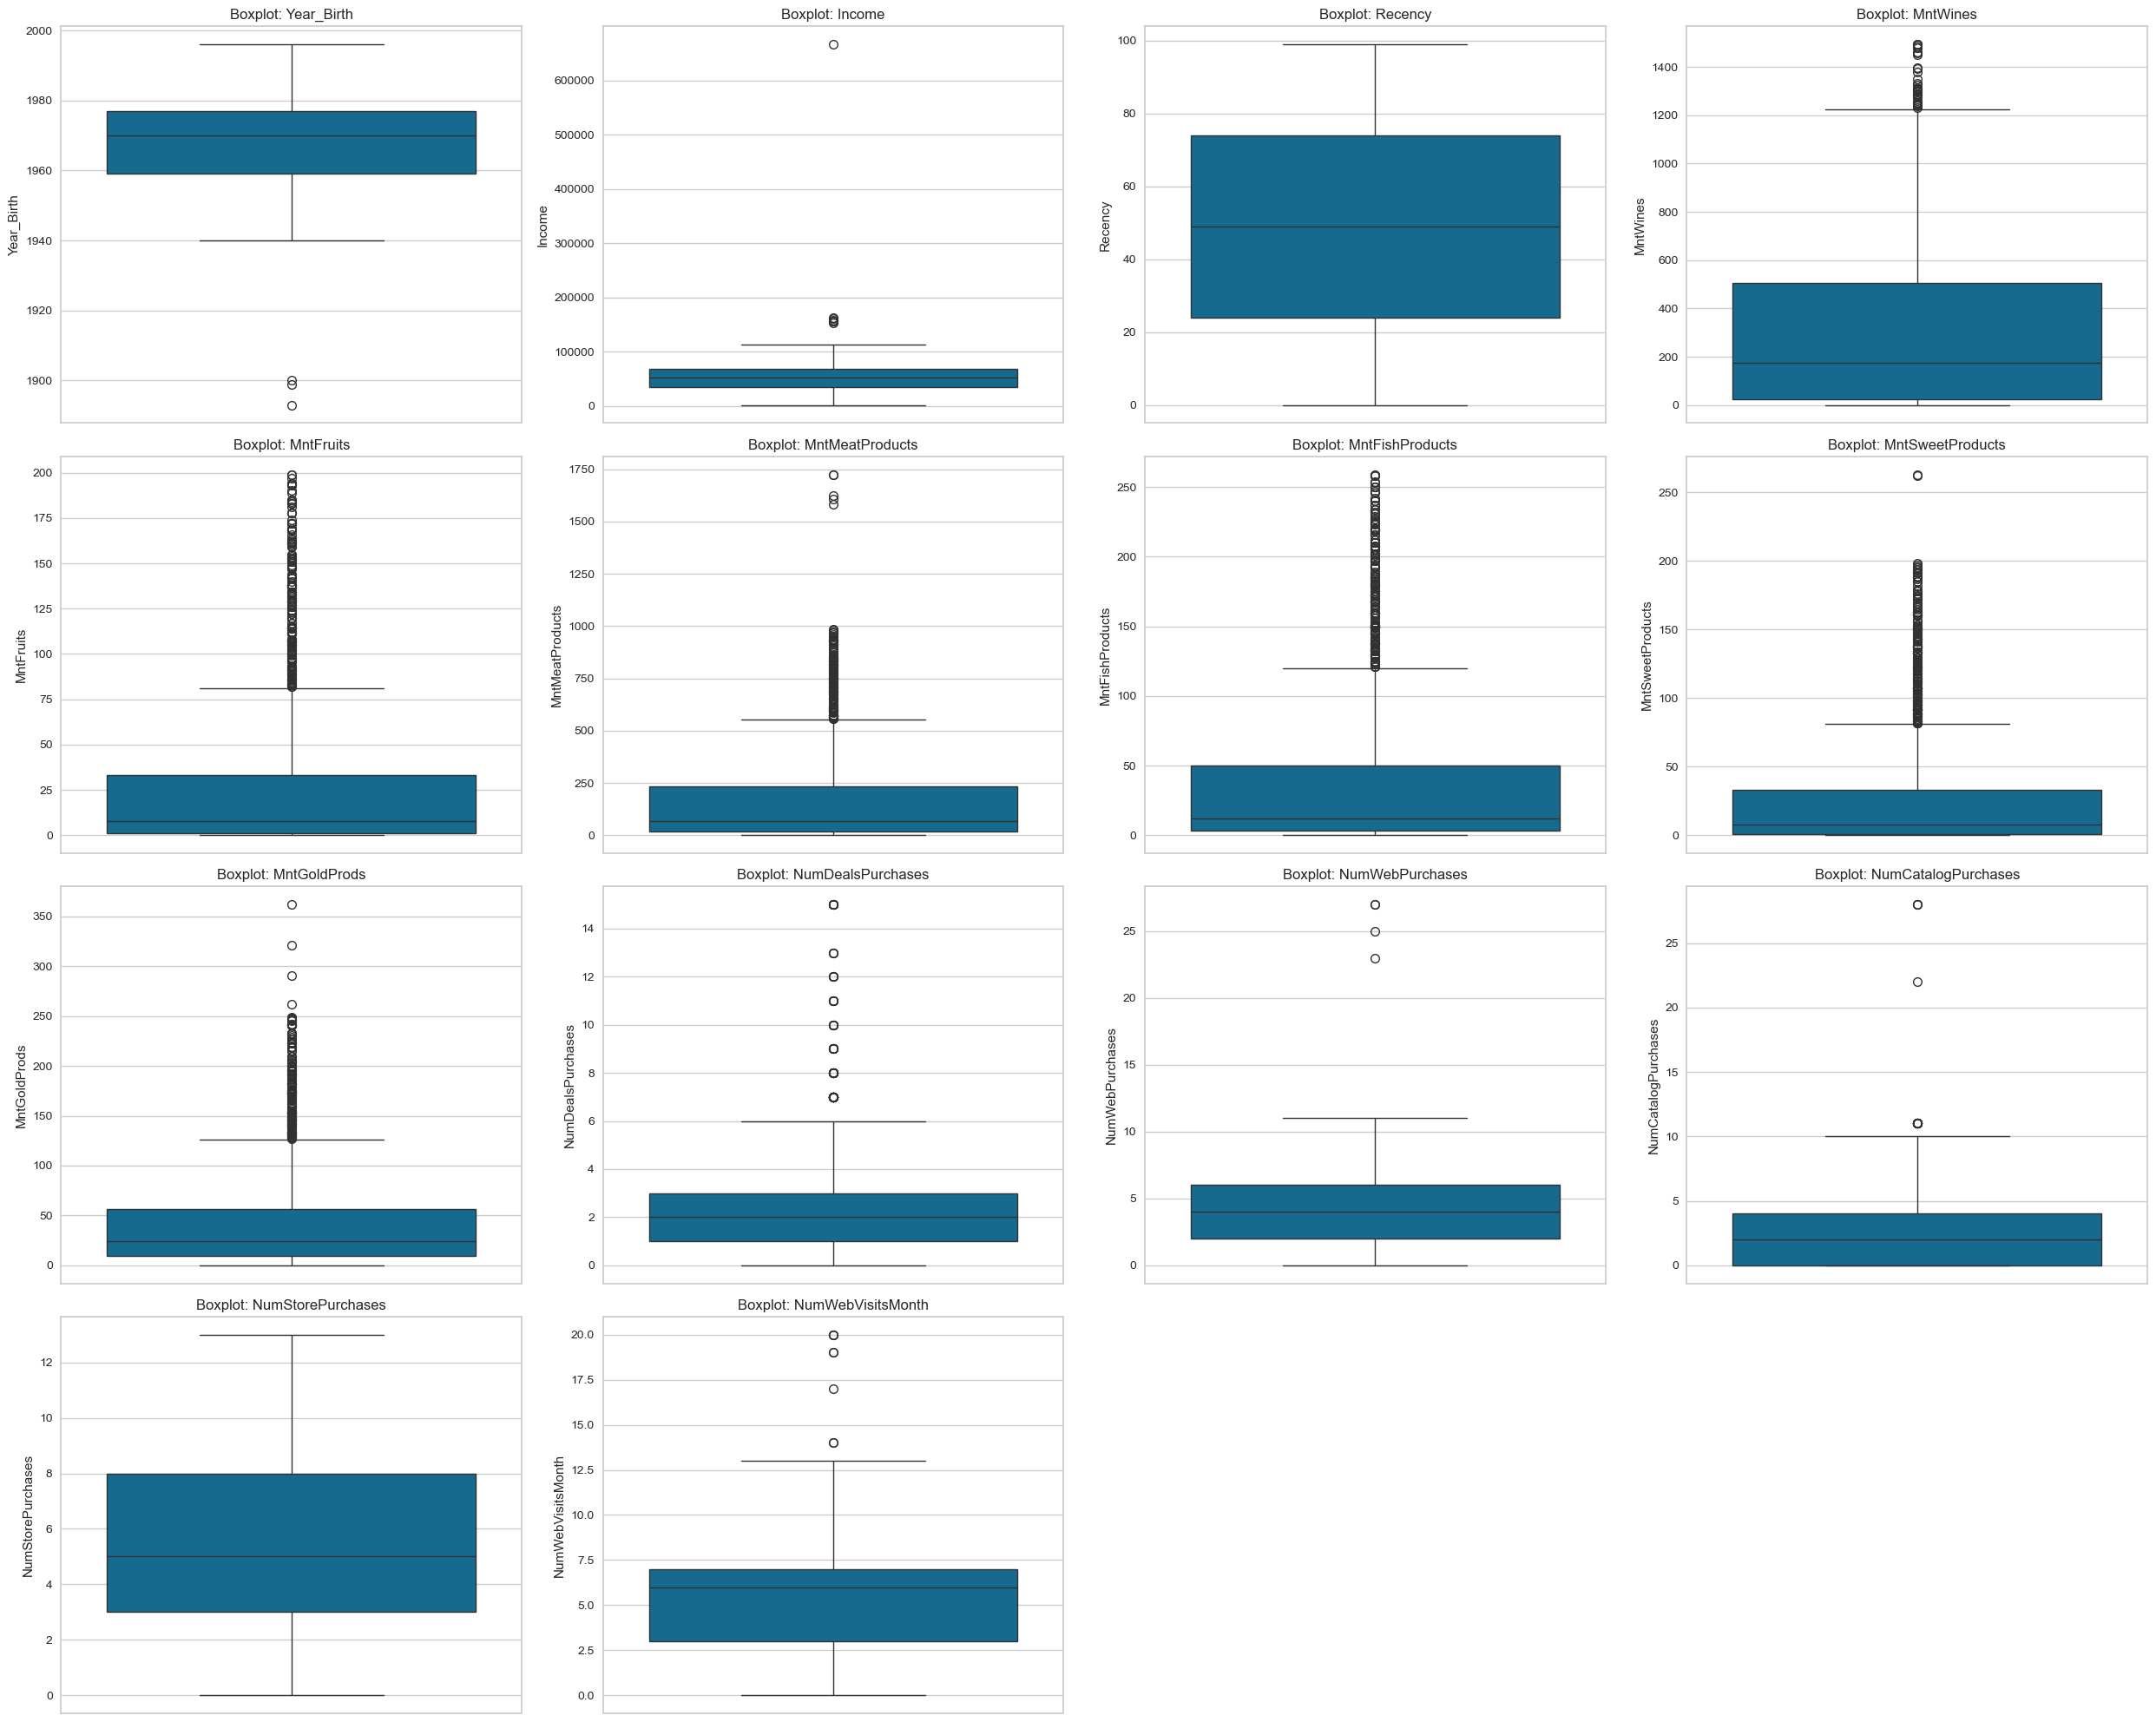

In [258]:
plt.figure(figsize=(25, 20))
vars_to_plot = [ 'Year_Birth','Income',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        ]
for i, variable in enumerate(vars_to_plot, 1):  
    plt.subplot(4, 4, i)  
    sns.boxplot(y=variable, data=df) 
    plt.title(f'Boxplot: {variable}') 

plt.tight_layout()
plt.show()

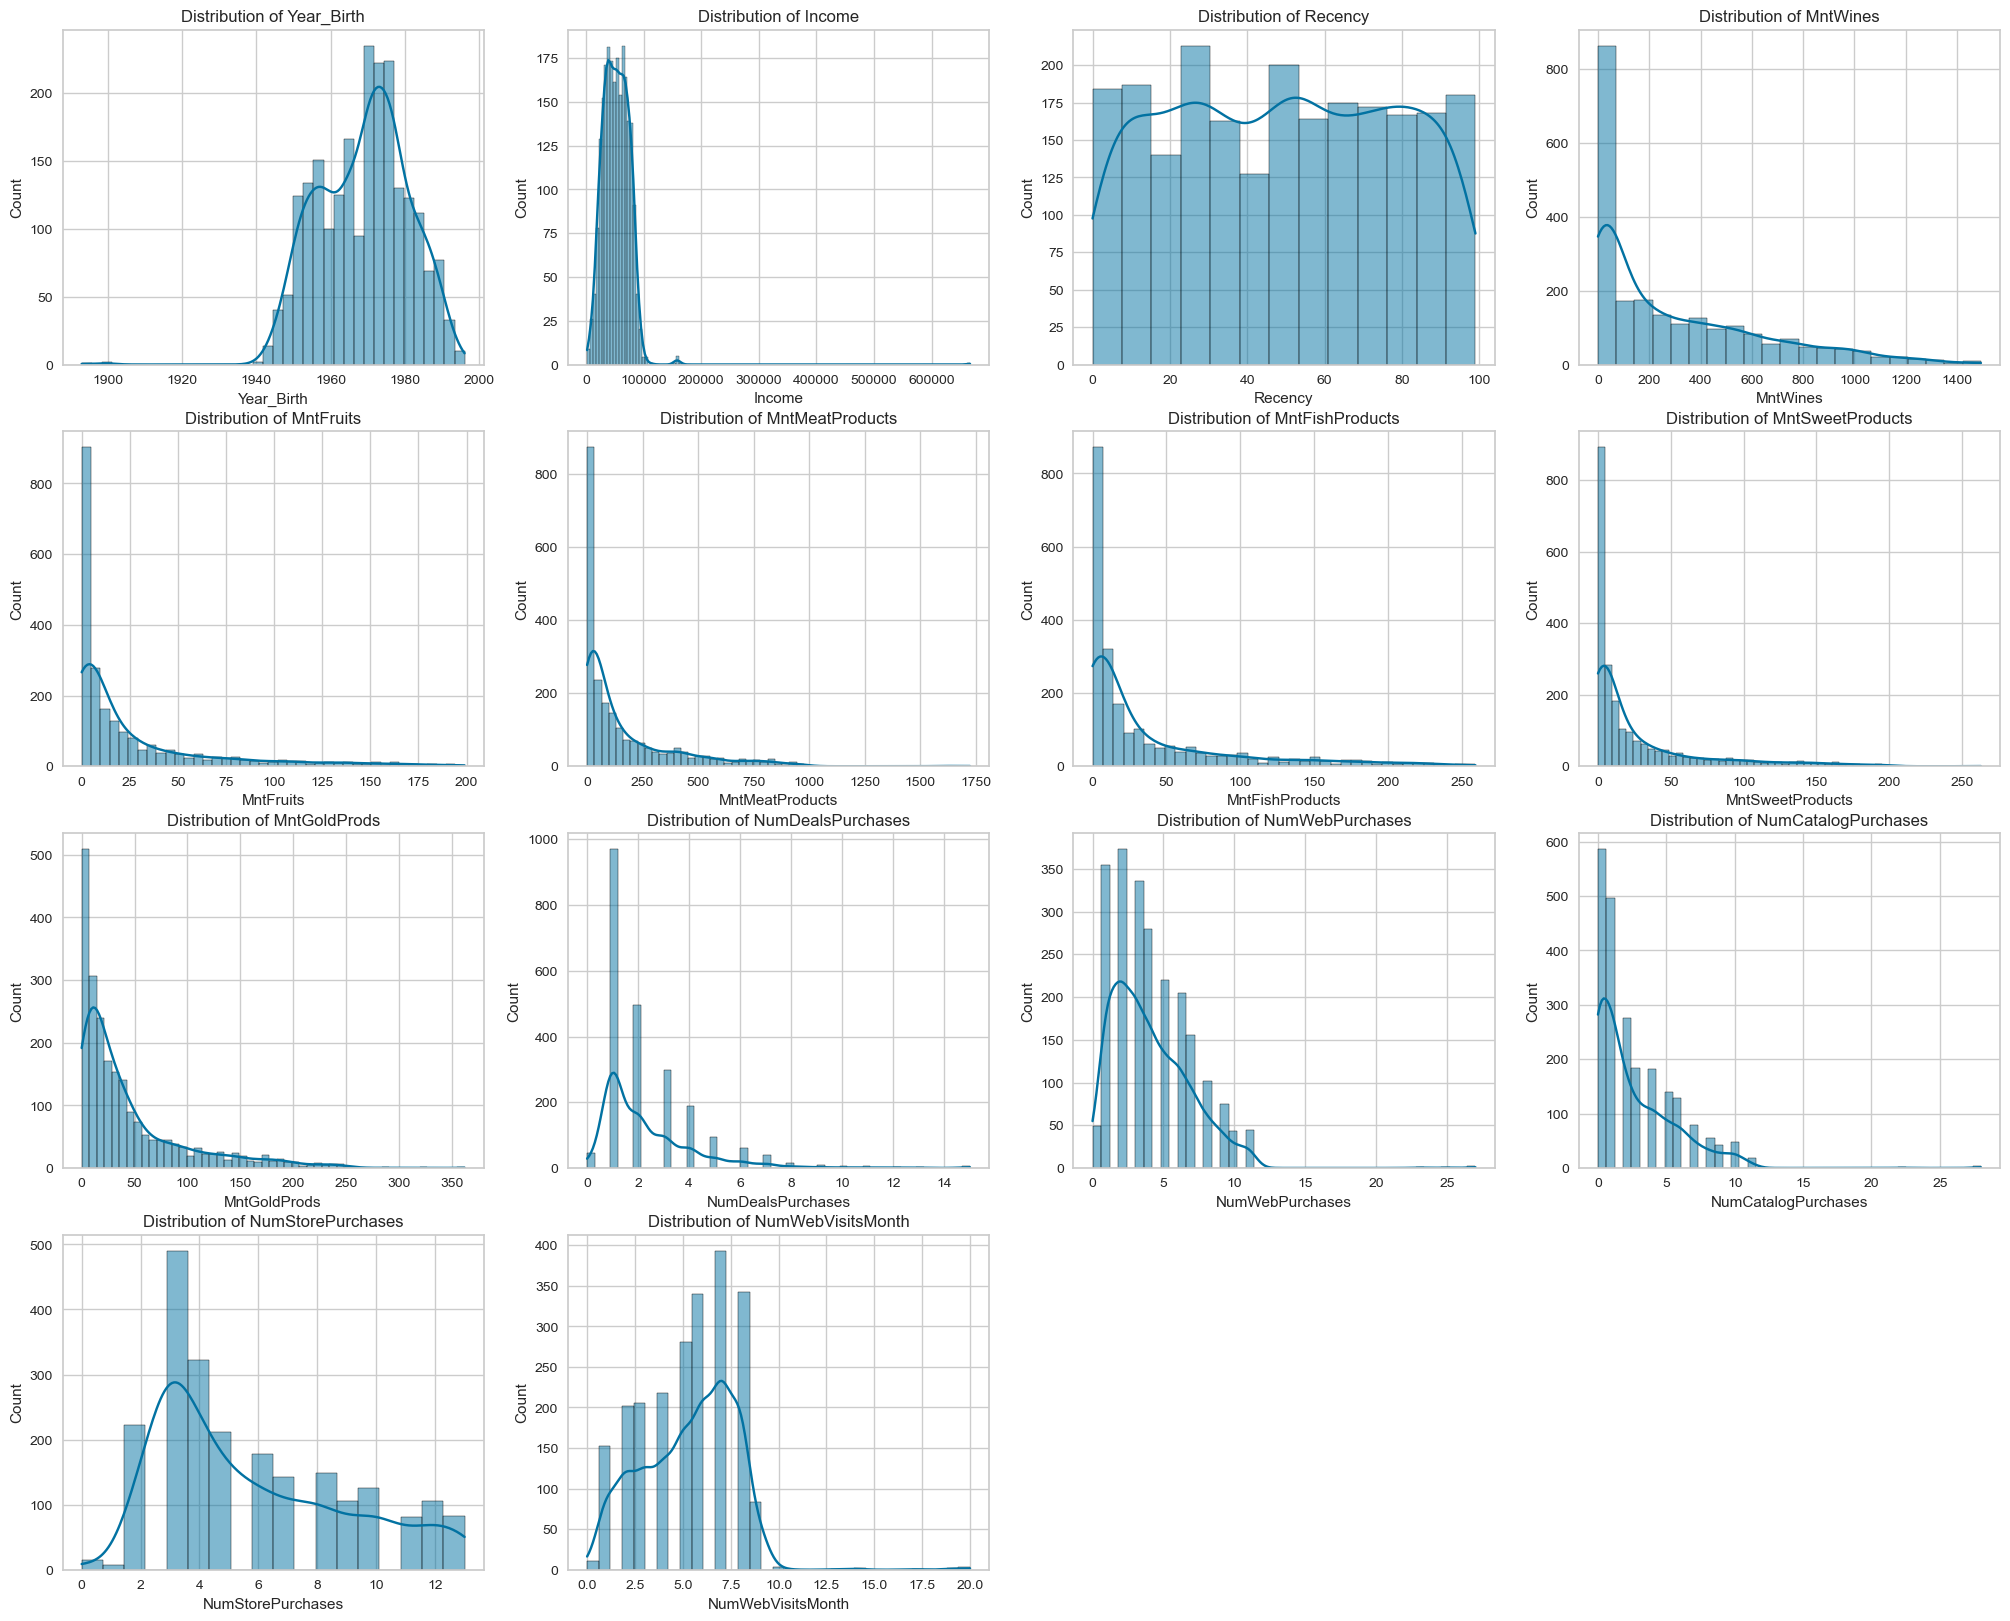

In [259]:
vars_to_plot = [ 'Year_Birth','Income',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        ]

plt.figure(figsize=(25, 20))
for i, variable in enumerate(vars_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribution of {variable}')

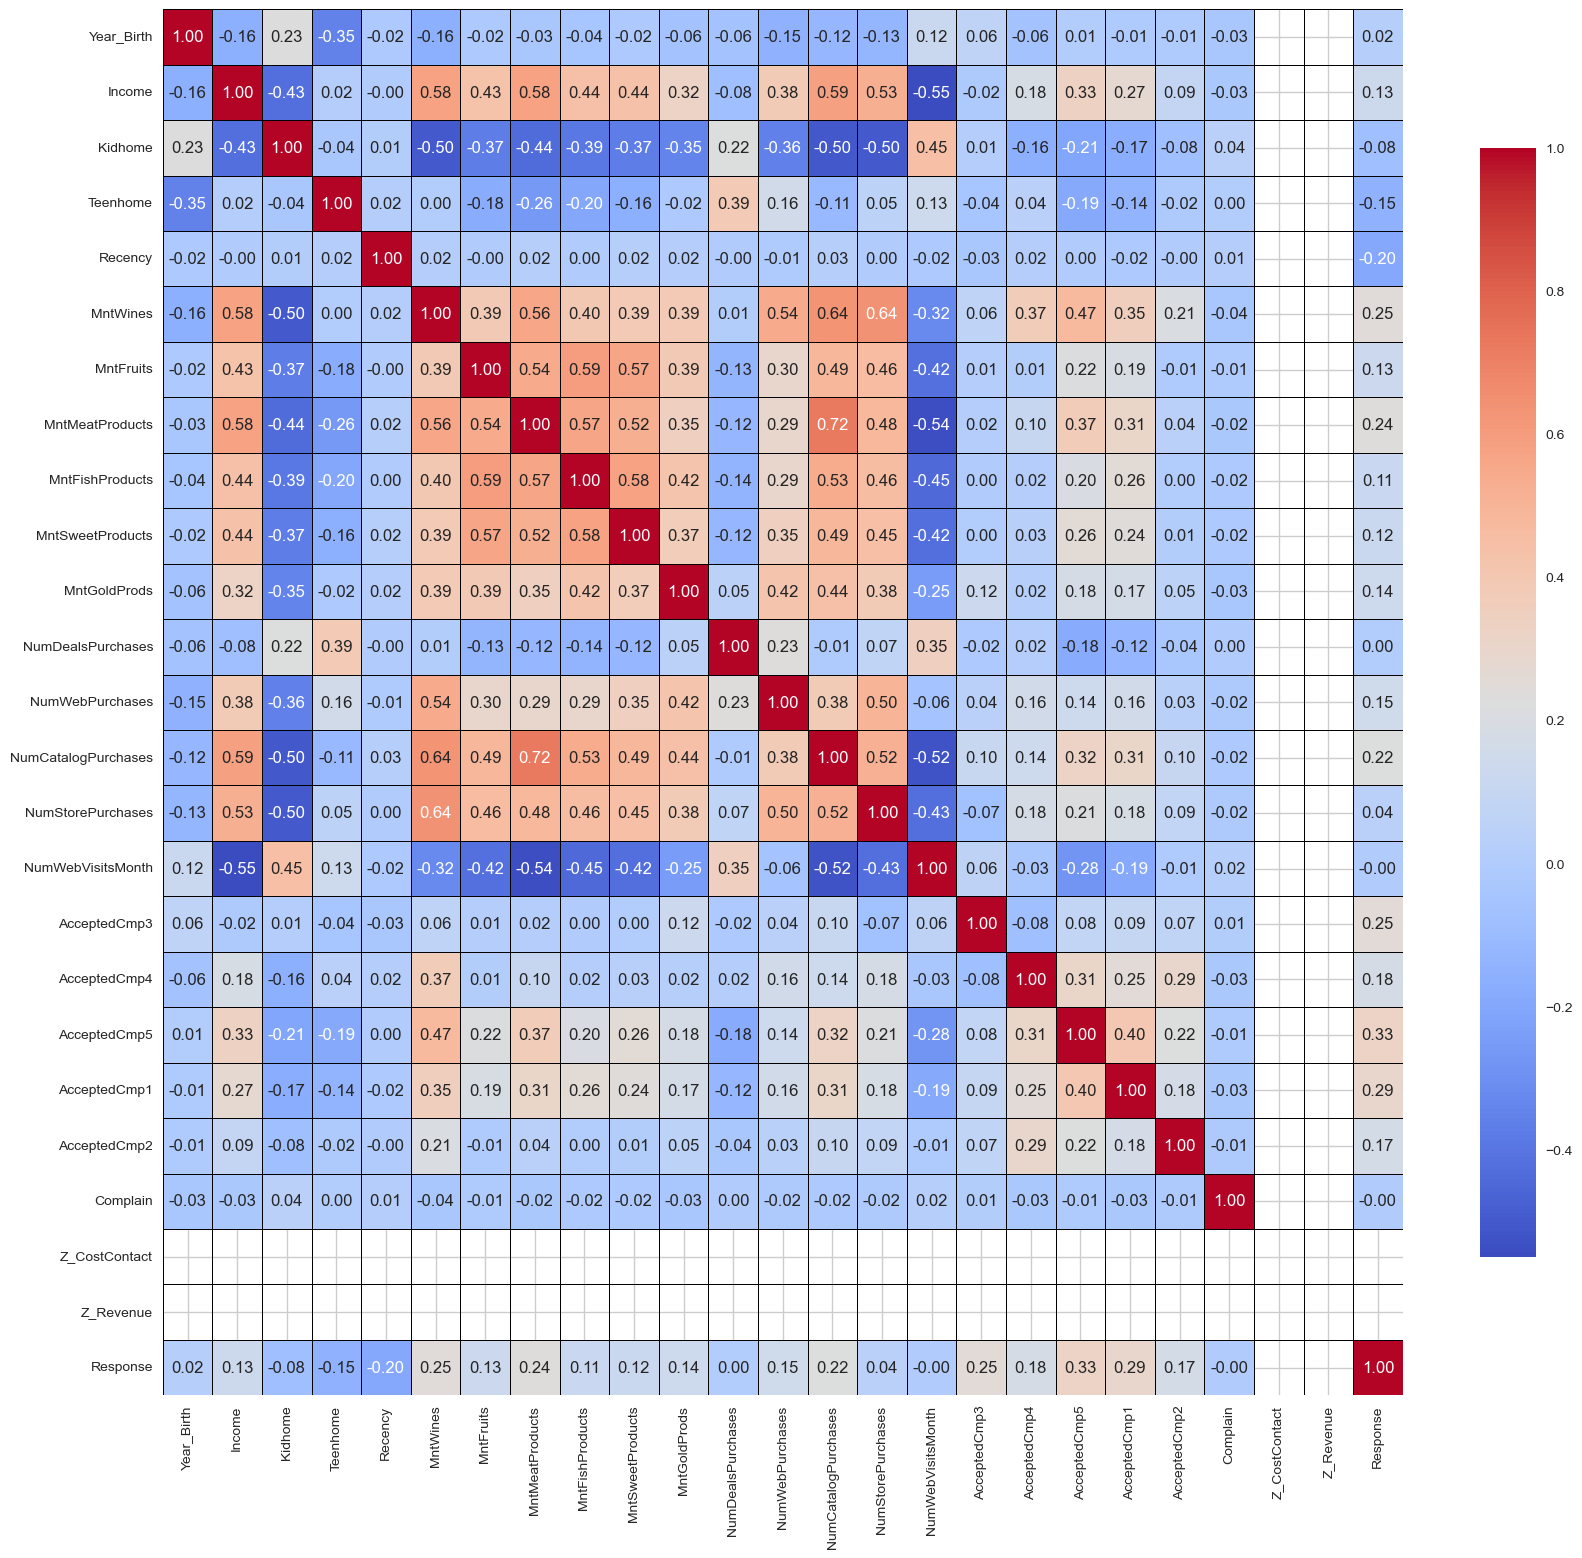

In [260]:

plt.figure(figsize=(20, 18))
#Matriz de Correlação
correlation = df[numerical_features].corr(method='pearson')

# Heatmap com rotação nos rótulos
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black', xticklabels=correlation.columns, yticklabels=correlation.columns, cbar_kws={"shrink": 0.8})

# Espaçamento entre os rótulos
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


# Feature Engineering

In [261]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calcula a quantidade de meses desde a data de cadastro até a data atual
current_date = pd.to_datetime(datetime.now())
df['years_as_customer'] = (current_date - df['Dt_Customer']).dt.days / 365
df['years_as_customer'] = df['years_as_customer'].round(1)

# Campanhas aceitas
df['TotalAcceptedCmp'] = df.filter(like='AcceptedCmp').sum(axis=1)

#Total Spent
df['TotalSpent'] = df.filter(like='Mnt').sum(axis=1)

#Total Purchases
df['TotalPurchases'] = df.filter(like='Purch').sum(axis=1)

#Total children living in the household
df['Children'] = df['Kidhome']+df['Teenhome']

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["New_Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Age
df['Age'] = 2021-df['Year_Birth']
df['Age_Group'] = pd.qcut(df['Age'], q=4) 

#Income
df['Income_Group'] = pd.qcut(df['Income'], q=4)

#Rename
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})



In [262]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,years_as_customer,TotalAcceptedCmp,TotalSpent,TotalPurchases,Children,Is_Parent,New_Education,Living_With,Age,Age_Group,Income_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12.2,0,1617,25,0,0,Graduate,Alone,64,"(62.0, 128.0]","(51741.5, 68289.75]"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10.7,0,27,6,2,1,Graduate,Alone,67,"(62.0, 128.0]","(35538.75, 51741.5]"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11.2,0,776,21,0,0,Graduate,Partner,56,"(51.0, 62.0]","(68289.75, 666666.0]"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10.8,0,53,8,1,1,Graduate,Partner,37,"(24.999, 44.0]","(1729.999, 35538.75]"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,10.8,0,422,19,1,1,Postgraduate,Partner,40,"(24.999, 44.0]","(51741.5, 68289.75]"


In [263]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'years_as_customer', 'TotalAcceptedCmp', 'TotalSpent', 'TotalPurchases',
       'Children', 'Is_Parent', 'New_Education', 'Living_With', 'Age',
       'Age_Group', 'Income_Group'],
      dtype='object')

### Feature Selection

In [264]:
#Manual Feature Selection

numerical_features = ['Children','TotalSpent',
       'TotalAcceptedCmp', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Age','Income']

categorical_features = ['New_Education', 'Marital_Status']
       

In [265]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,years_as_customer,TotalAcceptedCmp,TotalSpent,TotalPurchases,Children,Is_Parent,New_Education,Living_With,Age,Age_Group,Income_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12.2,0,1617,25,0,0,Graduate,Alone,64,"(62.0, 128.0]","(51741.5, 68289.75]"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10.7,0,27,6,2,1,Graduate,Alone,67,"(62.0, 128.0]","(35538.75, 51741.5]"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11.2,0,776,21,0,0,Graduate,Partner,56,"(51.0, 62.0]","(68289.75, 666666.0]"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10.8,0,53,8,1,1,Graduate,Partner,37,"(24.999, 44.0]","(1729.999, 35538.75]"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,10.8,0,422,19,1,1,Postgraduate,Partner,40,"(24.999, 44.0]","(51741.5, 68289.75]"


# Data Processing

### Pipeline

In [266]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) 
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)                 
           
])


# Fit preprocessing pipeline
df_preprocessed = preprocessor.fit_transform(df)

# Apply t-SNE
tsne_transform = TSNE(n_components=2, perplexity=55, random_state=42)
df_transformed = tsne_transform.fit_transform(df_preprocessed)

# Modeling

### K-means

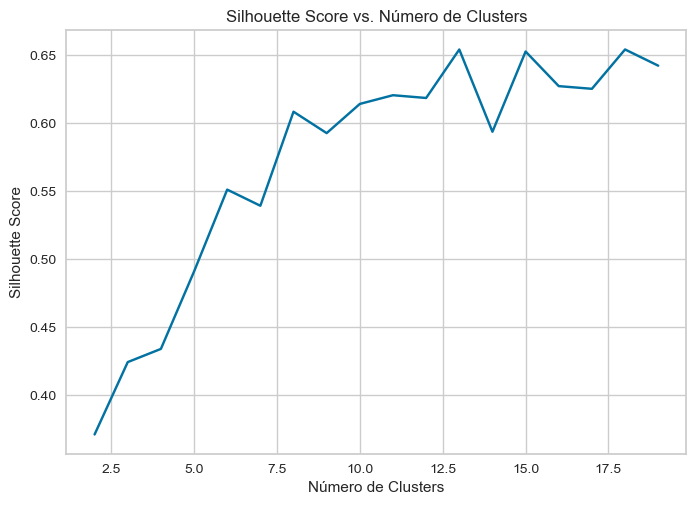

In [267]:
silhouette_scores = []
range_values = range(2, 20) 

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df_transformed)
    silhouette_scores.append(silhouette_score(df_transformed, labels))

plt.plot(range_values, silhouette_scores)
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Elbow Method to determine the number of clusters to be formed:


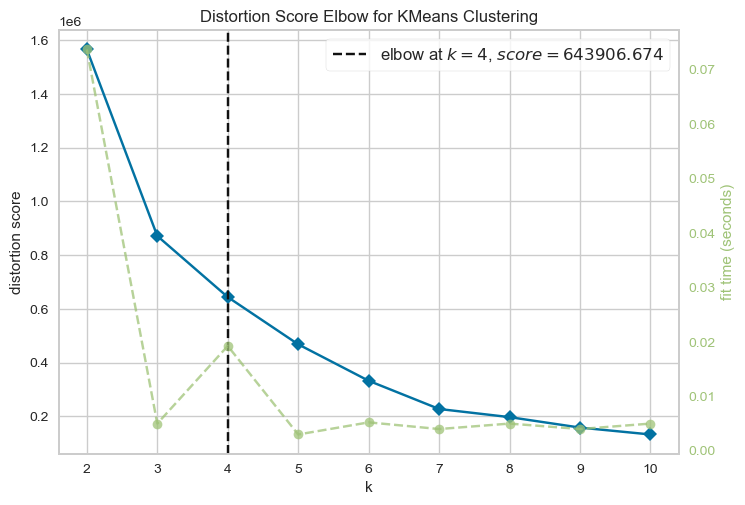

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [268]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_transformed)
Elbow_M.show()

In [269]:
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit_predict(df_transformed)

array([4, 4, 5, ..., 0, 6, 3])

In [270]:
df['cluster_kmeans'] = kmeans.labels_ 

In [271]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,years_as_customer,TotalAcceptedCmp,TotalSpent,TotalPurchases,Children,Is_Parent,New_Education,Living_With,Age,Age_Group,Income_Group,cluster_kmeans
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,12.2,0,1617,25,0,0,Graduate,Alone,64,"(62.0, 128.0]","(51741.5, 68289.75]",4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10.7,0,27,6,2,1,Graduate,Alone,67,"(62.0, 128.0]","(35538.75, 51741.5]",4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,11.2,0,776,21,0,0,Graduate,Partner,56,"(51.0, 62.0]","(68289.75, 666666.0]",5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10.8,0,53,8,1,1,Graduate,Partner,37,"(24.999, 44.0]","(1729.999, 35538.75]",5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,10.8,0,422,19,1,1,Postgraduate,Partner,40,"(24.999, 44.0]","(51741.5, 68289.75]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,11.4,0,1341,18,1,1,Graduate,Partner,54,"(51.0, 62.0]","(51741.5, 68289.75]",1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,10.4,1,444,22,3,1,Postgraduate,Partner,75,"(62.0, 128.0]","(51741.5, 68289.75]",6
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,10.8,1,1241,19,0,0,Graduate,Alone,40,"(24.999, 44.0]","(51741.5, 68289.75]",0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,10.8,0,843,23,1,1,Postgraduate,Partner,65,"(62.0, 128.0]","(68289.75, 666666.0]",6


In [272]:
silhouette_avg = silhouette_score(df_transformed, df['cluster_kmeans'])
print(f'Silhouette Score Médio: {silhouette_avg:.2f}')


Silhouette Score Médio: 0.59


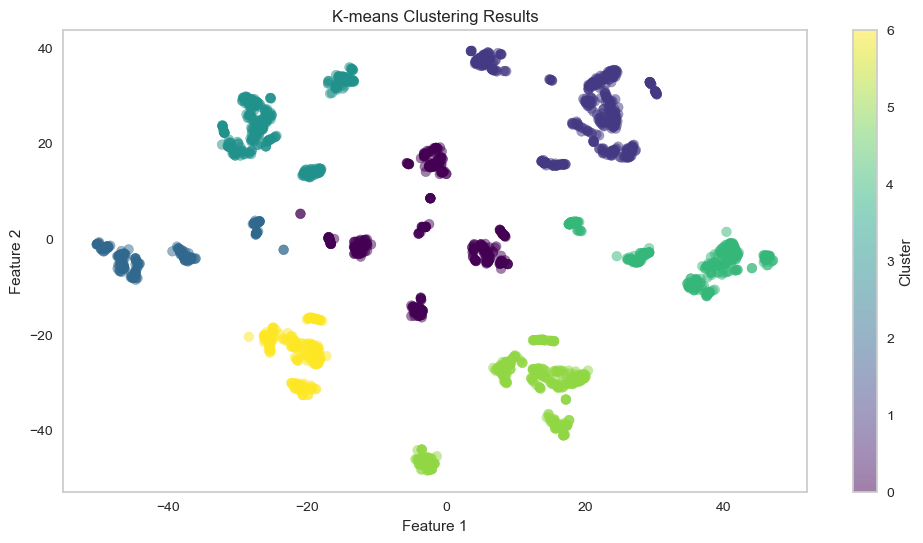

In [273]:
plt.figure(figsize=(12, 6))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

### DBSCAN

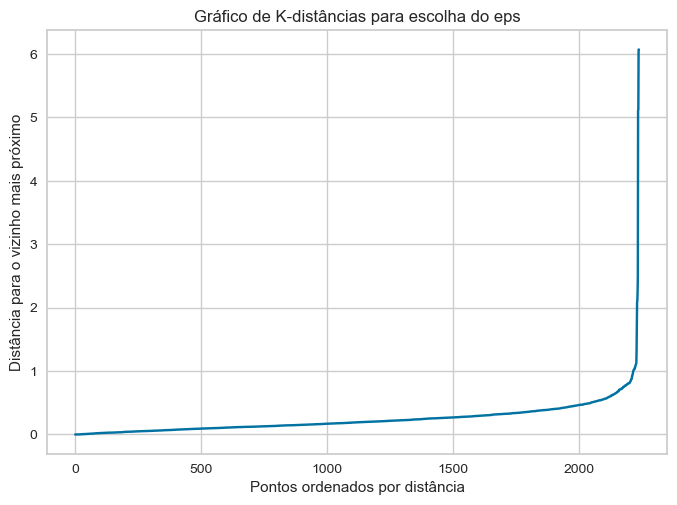

In [ ]:
min_samples = 3  

# Calculando as distâncias para os k-vizinhos mais próximos
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(df_transformed)
distances, indices = nbrs.kneighbors(df_transformed)

#  Ordenando as distâncias para encontrar o "cotovelo"
distances = np.sort(distances[:, min_samples - 1])  # pega apenas a maior distância para cada ponto

plt.plot(distances)
plt.ylabel('Distância para o vizinho mais próximo')
plt.xlabel('Pontos ordenados por distância')
plt.title('Gráfico de K-distâncias para escolha do eps')
plt.show()

In [275]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster = dbscan.fit_predict(df_transformed)

In [276]:
df['cluster_dbscan'] = dbscan.labels_


In [277]:
silhouette_avg = silhouette_score(df_transformed, df['cluster_dbscan'])
print(f'Silhouette Score Médio: {silhouette_avg:.2f}')


Silhouette Score Médio: 0.42


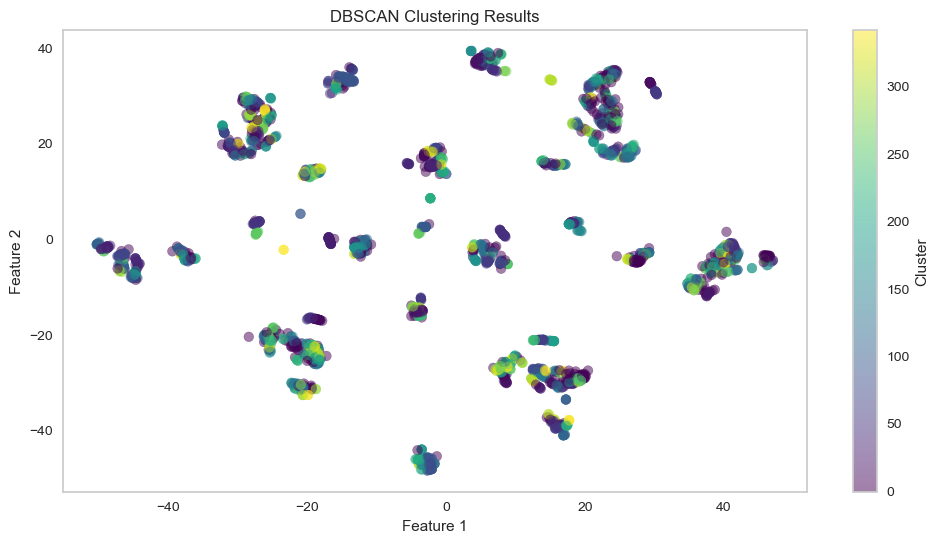

In [278]:
plt.figure(figsize=(12, 6))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


### Agglomerative Clustering 

In [279]:
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative.fit(df_transformed)
df['cluster_agg'] = agglomerative.labels_

In [280]:
silhouette_avg = silhouette_score(df_transformed, df['cluster_agg'])
print(f'Silhouette Score Médio: {silhouette_avg:.2f}')

Silhouette Score Médio: 0.45


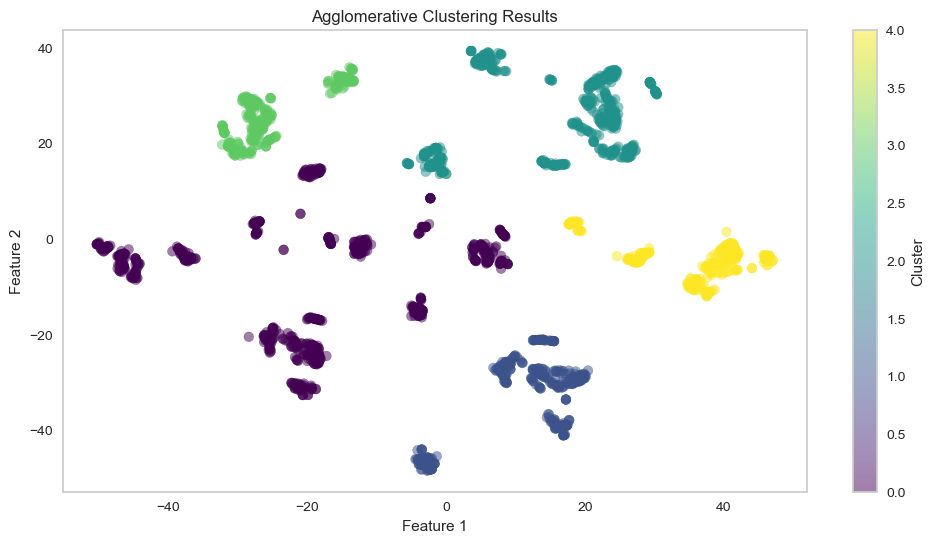

In [281]:
plt.figure(figsize=(12, 6))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1], c=agglomerative.labels_, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# EDA


C:\Users\pamel\AppData\Local\Temp\ipykernel_11396\1869234068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cluster_counts = df.groupby(['cluster_kmeans', 'Age_Group']).size().unstack(fill_value=0)


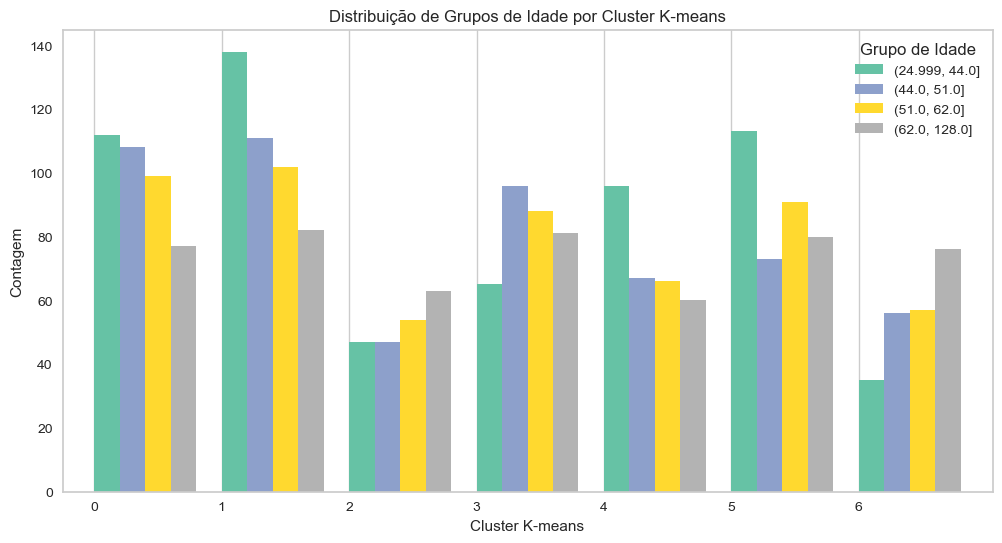

In [282]:

age_cluster_counts = df.groupby(['cluster_kmeans', 'Age_Group']).size().unstack(fill_value=0)


age_cluster_counts.plot(kind='bar', figsize=(12, 6), colormap='Set2', position=0, width=0.8)
plt.title('Distribuição de Grupos de Idade por Cluster K-means')
plt.xlabel('Cluster K-means')
plt.ylabel('Contagem')
plt.legend(title='Grupo de Idade')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

C:\Users\pamel\AppData\Local\Temp\ipykernel_11396\1731084392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_cluster_counts = df.groupby(['cluster_kmeans', 'Income_Group']).size().unstack(fill_value=0)


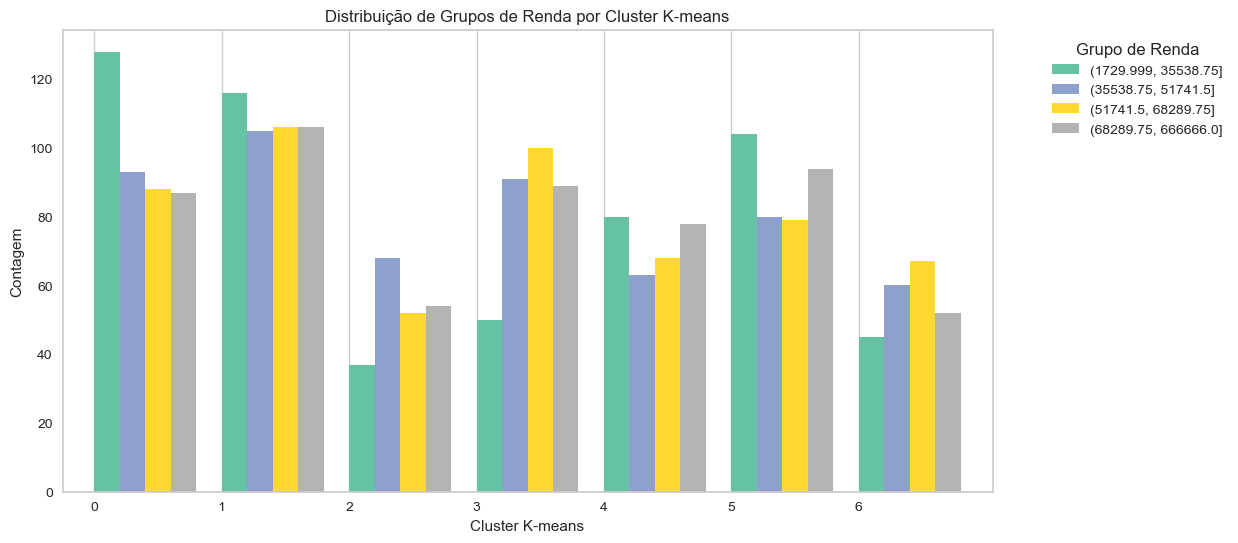

In [283]:

income_cluster_counts = df.groupby(['cluster_kmeans', 'Income_Group']).size().unstack(fill_value=0)

income_cluster_counts.plot(kind='bar', figsize=(12, 6), colormap='Set2', position=0, width=0.8)
plt.title('Distribuição de Grupos de Renda por Cluster K-means')
plt.xlabel('Cluster K-means')
plt.ylabel('Contagem')

plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


In [300]:
#Renda média por Cluster
grouped_clusters = df.groupby(['cluster_kmeans'])['Income'].mean()
print(grouped_clusters)

cluster_kmeans
0    48318.602280
1    50813.625879
2    54388.302152
3    56073.310614
4    51821.257814
5    52656.194685
6    54208.246682
Name: Income, dtype: float64


C:\Users\pamel\AppData\Local\Temp\ipykernel_11396\3058892629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_kmeans', y='TotalPurchases', data=df, palette='Set2')


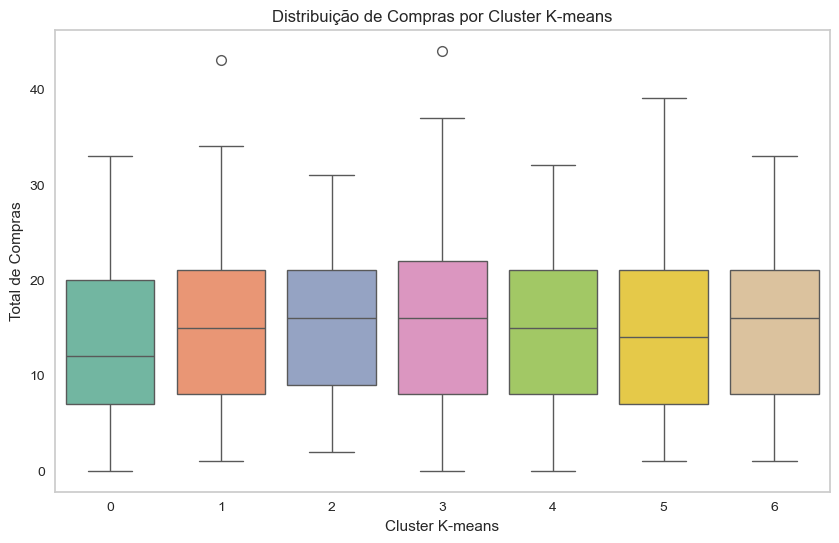

In [284]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_kmeans', y='TotalPurchases', data=df, palette='Set2')
plt.title('Distribuição de Compras por Cluster K-means')
plt.xlabel('Cluster K-means')
plt.ylabel('Total de Compras')
plt.grid(axis='y')
plt.show()


C:\Users\pamel\AppData\Local\Temp\ipykernel_11396\2150596617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster_kmeans', y='TotalAcceptedCmp', data=df, palette='Set2')


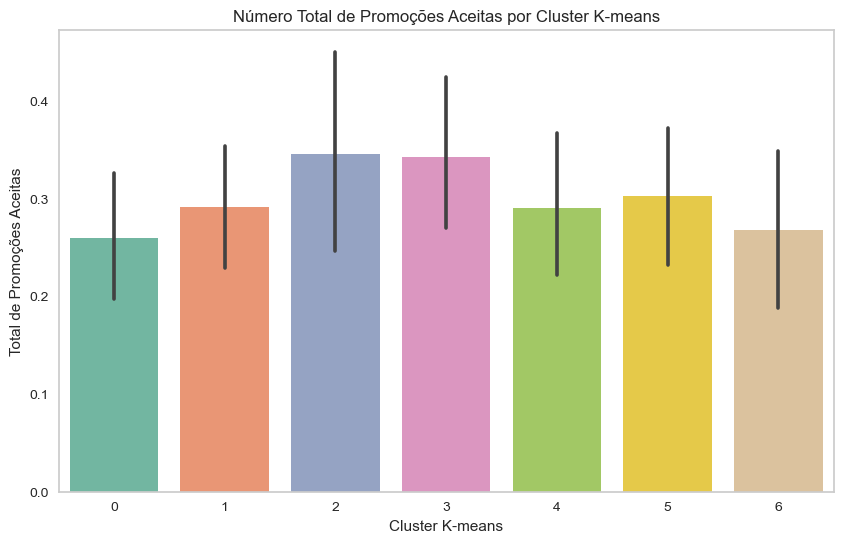

In [285]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_kmeans', y='TotalAcceptedCmp', data=df, palette='Set2')
plt.title('Número Total de Promoções Aceitas por Cluster K-means')
plt.xlabel('Cluster K-means')
plt.ylabel('Total de Promoções Aceitas')
plt.grid(axis='y')
plt.show()

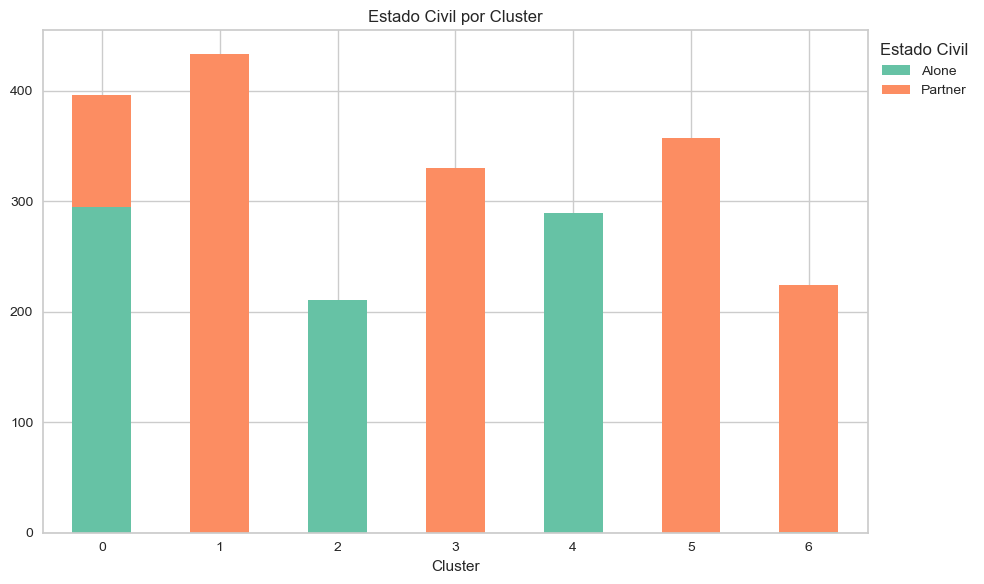

In [287]:
df_grouped = df.groupby(['cluster_kmeans', 'Living_With']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(10, 6))


plt.title('Estado Civil por Cluster')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Estado Civil', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



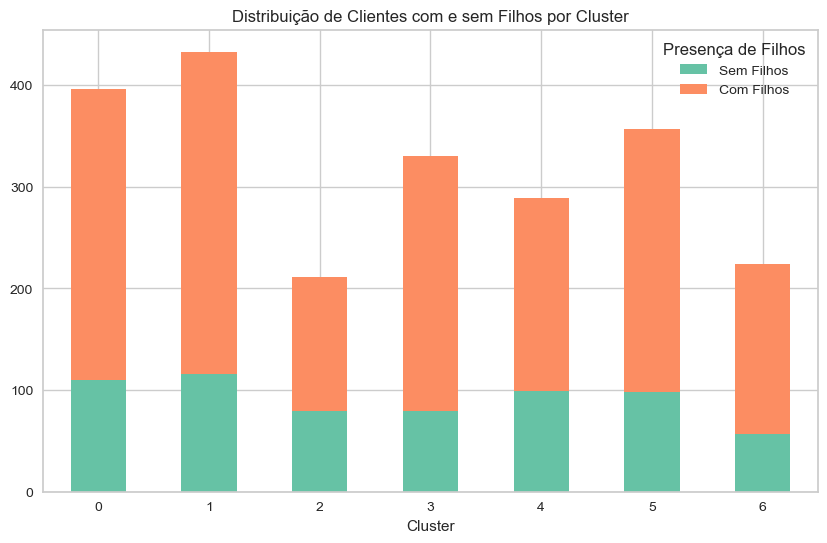

In [288]:
df_grouped = df.groupby(['cluster_kmeans', 'Is_Parent']).size().unstack(fill_value=0)

colors = ['#66c2a5', '#fc8d62'] 

df_grouped.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.title('Distribuição de Clientes com e sem Filhos por Cluster')
plt.xlabel('Cluster')
plt.legend(['Sem Filhos', 'Com Filhos'], title='Presença de Filhos')
plt.xticks(rotation=0)
plt.show()


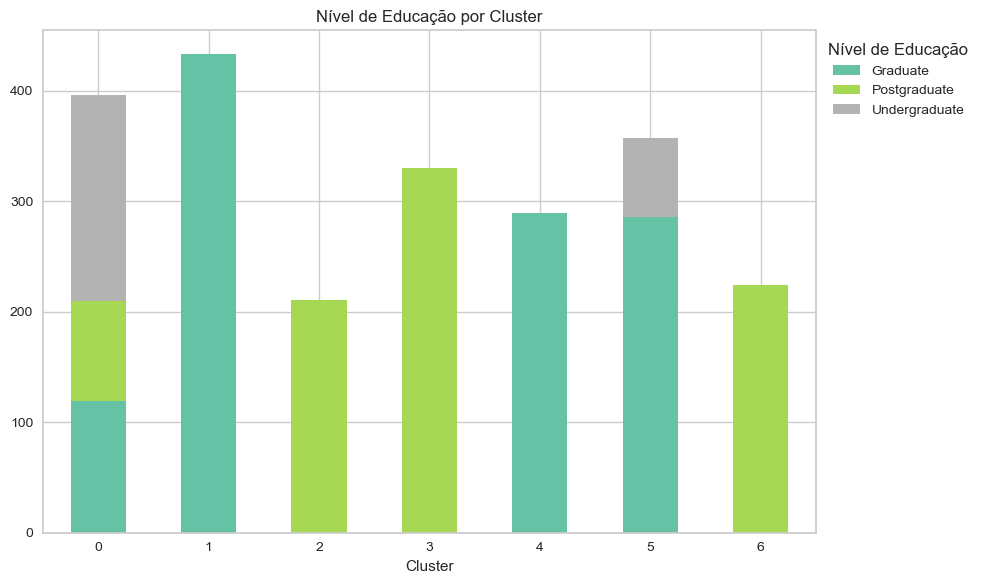

In [289]:

df_grouped = df.groupby(['cluster_kmeans', 'New_Education']).size().unstack()


df_grouped.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))

plt.title('Nível de Educação por Cluster')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Nível de Educação', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()


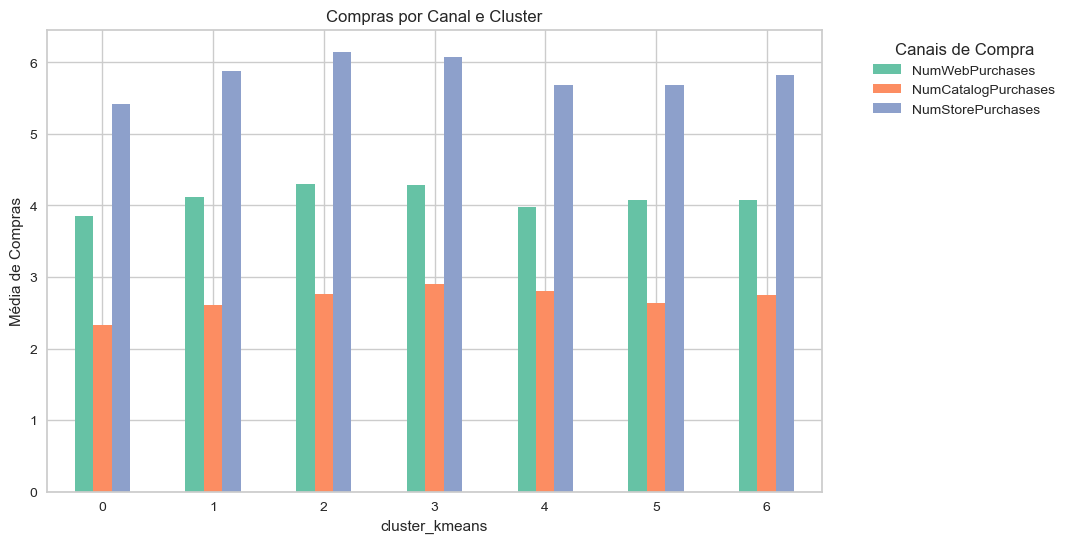

In [290]:
df_grouped = df.groupby('cluster_kmeans')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

ax = df_grouped.plot(kind='bar', color=sns.color_palette('Set2'), figsize=(10, 6))
plt.title('Compras por Canal e Cluster')
plt.ylabel('Média de Compras')
plt.xticks(rotation=0)

plt.legend(title='Canais de Compra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\pamel\AppData\Local\Temp\ipykernel_11396\1623889627.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_kmeans', y='Recency', data=df,palette='Set2')


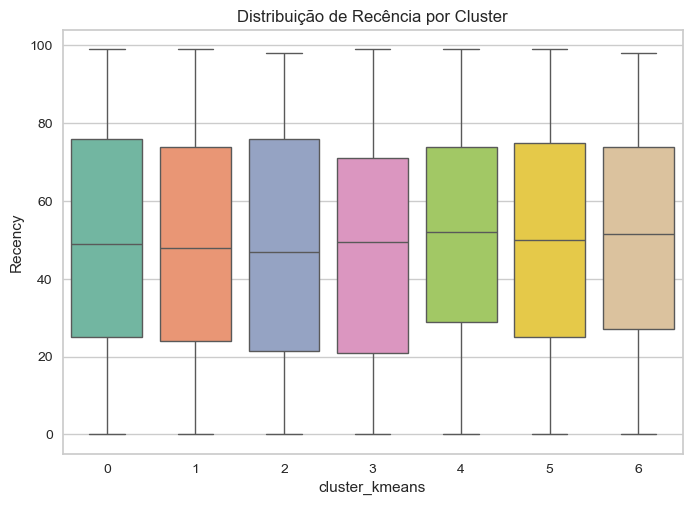

In [291]:
sns.boxplot(x='cluster_kmeans', y='Recency', data=df,palette='Set2')
plt.title('Distribuição de Recência por Cluster')
plt.show()

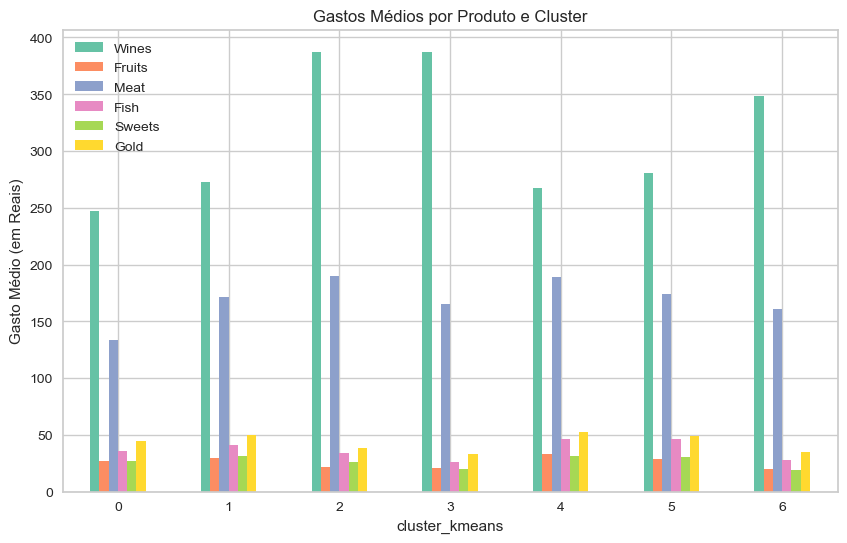

In [292]:
colors = sns.color_palette('Set2')

df.groupby('cluster_kmeans')[['Wines', 'Fruits', 'Meat', 'Fish', 
                       'Sweets', 'Gold']].mean().plot(kind='bar', figsize=(10,6), color=colors)
plt.title('Gastos Médios por Produto e Cluster')
plt.ylabel('Gasto Médio (em Reais)')
plt.xticks(rotation=0)
plt.show()

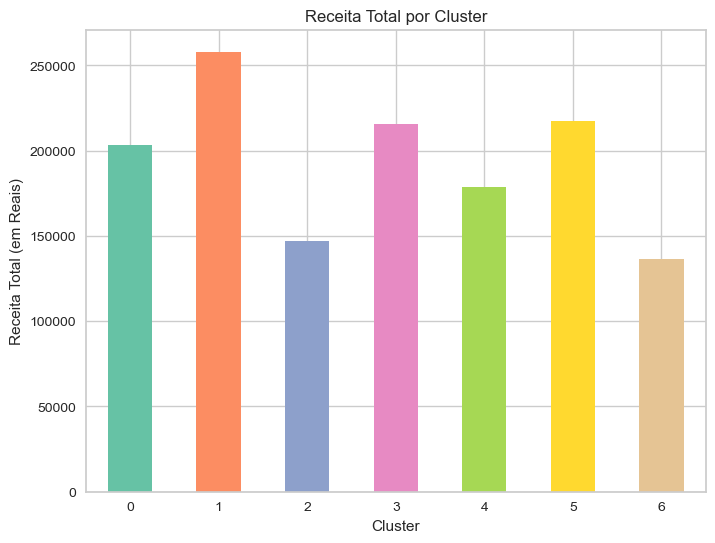

In [293]:
TotalSpent_by_cluster = df.groupby('cluster_kmeans')['TotalSpent'].sum()

colors = sns.color_palette('Set2')

TotalSpent_by_cluster.plot(kind='bar', color=colors, figsize=(8, 6))

# Adicionar título e rótulos
plt.title('Receita Total por Cluster')
plt.ylabel('Receita Total (em Reais)')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()


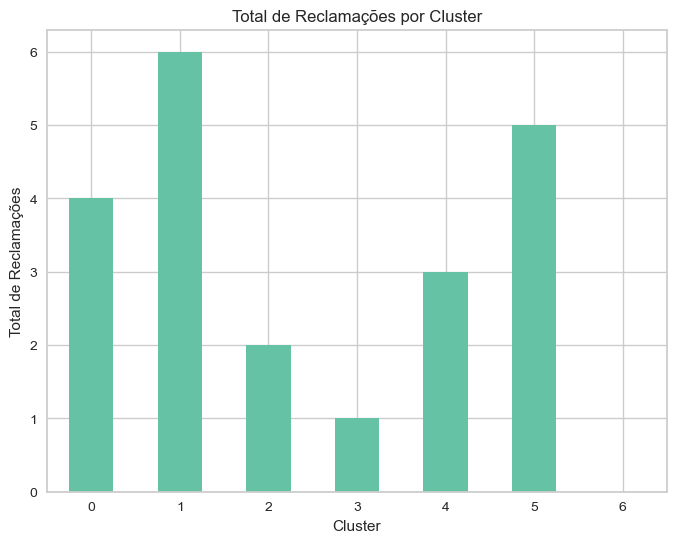

In [294]:
df.groupby('cluster_kmeans')['Complain'].sum().plot(kind='bar', color=sns.color_palette('Set2')[0], figsize=(8, 6))

plt.title('Total de Reclamações por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Reclamações')
plt.xticks(rotation=0)
plt.show()




In [ ]:
#Renda média por Cluster
grouped_clusters = df.groupby(['cluster_kmeans'])['Income'].mean()
print(grouped_clusters)

cluster_kmeans
0    48318.602280
1    50813.625879
2    54388.302152
3    56073.310614
4    51821.257814
5    52656.194685
6    54208.246682
Name: Income, dtype: float64


# Análise Final dos Clusters

## Produto Mais Consumido
O **Vinho** é o produto mais consumido por todos os clusters. Todos os clusters preferem comprar em lojas físicas.

---

## Cluster 0: "Conservadores"

**Perfil de Compra:**
- **Receita Gerada:** Baixa receita, um dos clusters com menor geração de receita.
- **Aceitação de Promoções:** Um dos grupos que menos aceita promoções.
- **Comportamento de Compras:** Realiza um número reduzido de compras.
- **Reclamações:** Poucas reclamações registradas.

**Perfil Demográfico:**
- **Idade:** Idade bem distribuída, mas predominância de indivíduos acima de 62 anos (majoritariamente idosos).
- **Estado Civil e Filhos:** A maioria vive com seus parceiros e tem filhos.
- **Nível de Educação:** A maior parte possui pós-graduação.
- **Renda:** A renda é bem distribuída entre os indivíduos desse cluster.

---

## Cluster 1: "Influentes"

**Perfil de Compra:**
- **Receita Gerada:** Este cluster é o maior gerador de receita.
- **Aceitação de Promoções:** Aceita promoções de maneira média.
- **Comportamento de Compras:** Registra um número significativo de compras.
- **Reclamações:** Este cluster é o que mais registra reclamações.

**Perfil Demográfico:**
- **Idade:** Predominância de indivíduos entre 25 e 44 anos.
- **Estado Civil e Filhos:** Composto majoritariamente por pessoas que vivem com seus parceiros e têm filhos.
- **Nível de Educação:** A maioria possui graduação.
- **Renda:** A maioria tem renda média para alta.

---

## Cluster 2: "Aposentados"

**Perfil de Compra:**
- **Receita Gerada:** Um dos clusters com menor geração de receita.
- **Aceitação de Promoções:** Este é o cluster que mais aceita promoções.
- **Comportamento de Compras:** Número reduzido de compras.
- **Reclamações:** Poucas reclamações registradas.

**Perfil Demográfico:**
- **Idade:** Idade bem distribuída, mas com maioria acima de 62 anos (principalmente idosos).
- **Estado Civil e Filhos:** Predominância de pessoas que vivem sozinhas; muitos têm filhos, mas uma parte significativa não tem.
- **Nível de Educação:** Maioria com pós-graduação.
- **Renda:** Alta renda entre os membros desse cluster.

---

## Cluster 3: "Experientes"

**Perfil de Compra:**
- **Receita Gerada:** Um dos clusters que mais gera receita.
- **Aceitação de Promoções:** Aceita promoções com facilidade.
- **Comportamento de Compras:** Menor número de reclamações.
- **Reclamações:** Registra um número relativamente baixo de reclamações.

**Perfil Demográfico:**
- **Idade:** Predominância de pessoas entre 44 e 62 anos.
- **Estado Civil e Filhos:** Composto principalmente por pessoas que vivem com seus parceiros e têm filhos.
- **Nível de Educação:** A maioria possui pós-graduação.
- **Renda:** A renda é bem distribuída dentro deste cluster.

---

## Cluster 4: "Independentes"

**Perfil de Compra:**
- **Receita Gerada:** Baixa geração de receita.
- **Aceitação de Promoções:** Aceita promoções dentro da média.
- **Comportamento de Compras:** Não apresenta muitas reclamações.
- **Reclamações:** Um dos clusters com menos reclamações.

**Perfil Demográfico:**
- **Idade:** A maioria tem entre 25 e 44 anos.
- **Estado Civil e Filhos:** Composto principalmente por pessoas que vivem sozinhas e têm filhos.
- **Nível de Educação:** A maioria possui graduação.
- **Renda:** A renda é bem distribuída entre os indivíduos desse cluster.

---

## Cluster 5: "Profissionais"

**Perfil de Compra:**
- **Receita Gerada:** Um dos clusters com maior geração de receita.
- **Aceitação de Promoções:** Aceita promoções de maneira moderada.
- **Comportamento de Compras:** Este cluster é o que mais registra reclamações.

**Perfil Demográfico:**
- **Idade:** A maioria tem entre 25 e 44 anos.
- **Estado Civil e Filhos:** Predominância de pessoas que vivem com seus parceiros e têm filhos.
- **Nível de Educação:** A maioria possui graduação, com uma pequena parte sem graduação.
- **Renda:** A renda é bem distribuída, abrangendo diferentes faixas de salário.

---

## Cluster 6: "Solitários"

**Perfil de Compra:**
- **Receita Gerada:** Um dos clusters com maior geração de receita.
- **Aceitação de Promoções:** Aceita promoções de maneira média.
- **Comportamento de Compras:** Registra várias reclamações.

**Perfil Demográfico:**
- **Idade:** A maioria tem entre 44 e 62 anos.
- **Estado Civil e Filhos:** Maioria vive sozinha e tem filhos.
- **Nível de Educação:** Composto por pessoas graduadas e pessoas sem graduação.
- **Renda:** A renda é bem distribuída, mas a maior parte é de baixa renda.

---
